In [1]:
import numpy as np
import matplotlib.pyplot  as plt


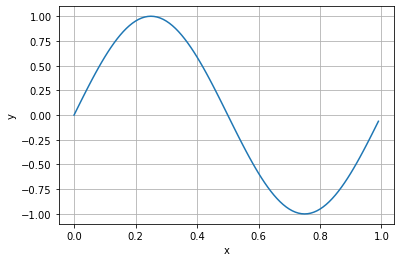

In [2]:
# 7.2
x = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * x)

fig, ax = plt.subplots()
ax.plot(x, s)

ax.set(xlabel='x', ylabel='y',title='')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [228]:
#7.3
rand_mat=np.random.rand(10,1)

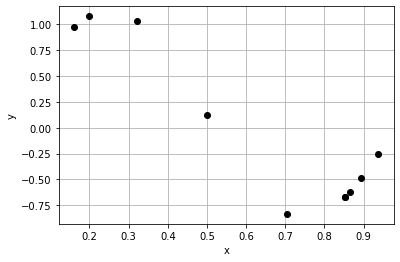

In [230]:
#7.4
x=np.random.rand(10,1)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1)
fig, ax = plt.subplots()
ax.set(xlabel='x', ylabel='y',title='')
ax.grid()
plt.plot(x,y,'o',c='black')
plt.show()

In [ ]:
#7.5
def generate_data_data(A=[10,20,50,100]):
    for i in A:
        x=np.random.rand(i,1)
        y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1)
        mat=np.column_stack((x, y))   
        print(mat)
        print()
        np.savetxt(f'N-%s.txt' % (str(i)), mat)

generate_data_data()

In [8]:
#7.7
def generate_matrix(M, x):
    N=len(x)
    A=np.empty((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            sum=0
            for n in range(N):
                sum+=x[n]**(i+j)
            A[i][j]=sum
    return A


def generate_vector(M, data):
    N=len(data[:, 0])
    T=np.empty((M+1))
    for i in range(M+1):
        sum=0
        for n in range(N):
            sum+=(data[n][0]**i)*data[n][1]
        T[i]=sum
    return T

In [9]:
#7.8
def calc_coeff(A,T):
    return np.linalg.solve(A,T)

In [10]:
def calc_polynomial(M,x,w):
    N=len(x)
    y=np.empty((N,1))
    for n in range(N):
        sum=0
        for j in range(M+1):
            sum+=w[j]*(x[n]**j)
        y[n]=sum
    
    return y

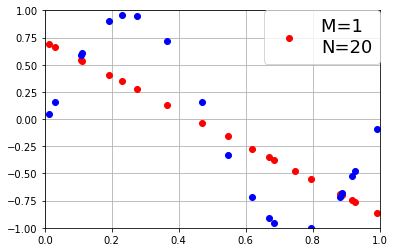

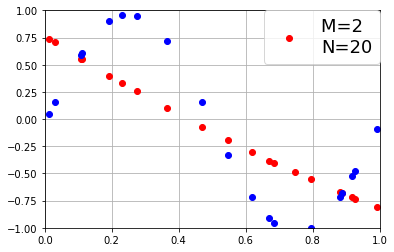

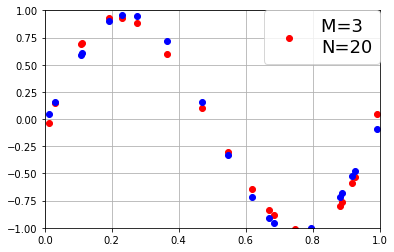

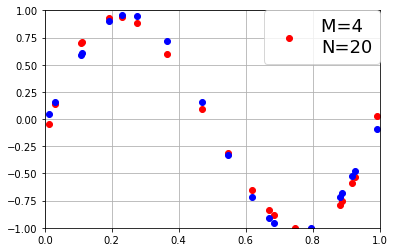

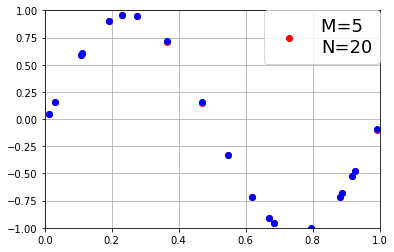

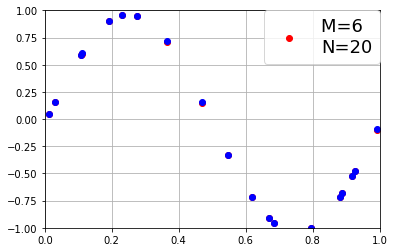

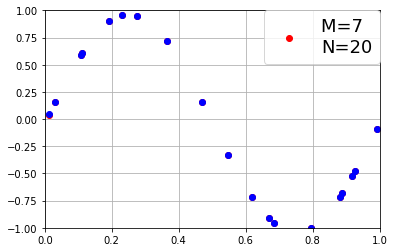

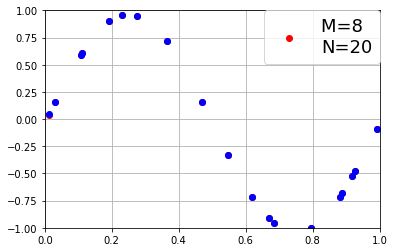

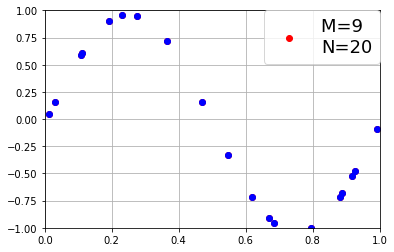

No handles with labels found to put in legend.


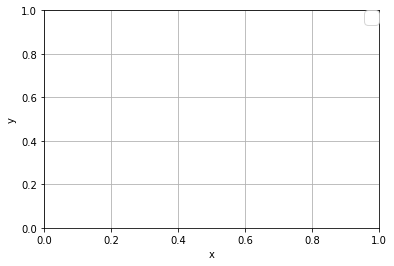

In [245]:
#7.9
data=np.loadtxt('N-20.txt')
#逆行列が計算できないときはこのセルを実行しなおす
np.random.shuffle(data)
x,y=data[:,0], data[:,1]
polynomials=[]
x_=[i for i in range(1,10)]
for m in range(1,10):
    A=generate_matrix(m,x)
    T=generate_vector(m,data)
    w=calc_coeff(A,T)
    polynomials.append(calc_polynomial(m,x,w))
    plt.plot(x,polynomials[m-1],'o', color='r', label=f'M=%s \nN=20' % (str(m)))
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
    plt.axis([0,1,-1, 1])
    plt.plot(x,y,'o', color='blue', label='actual data\nN=20')
    plt.grid()
    plt.show()
    

fig, ax = plt.subplots()
ax.set(xlabel='x', ylabel='y',title='')
ax.grid()


plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)

plt.show()

In [20]:
#7.11
def calc_erms(M,x,t,w):
    N=len(t)
    y=calc_polynomial(M,x,w)
    
    sum=0
    for n in range(N):
        sum+=np.power(y[n]-t[n], 2)
    
    return np.sqrt(sum/N)

In [62]:
#7.12

data=np.loadtxt('N-20.txt')
#逆行列が計算できないときはこのセルを実行し直す
np.random.shuffle(data)
x_first_half, x_second_half=data[:20//2,0], data[20//2:,0]
t_first_half, t_second_half=data[:20//2,1], data[20//2:,1]
data_first_half, data_second_half=data[:20//2,], data[20//2:,]
def minimize_erms(M, N, iteration=100):
    min_erms=100000000
    min_coeff=np.full((M+1,1), 100000000)
    
    for _ in range(iteration):
        np.random.shuffle(data)
        _A=generate_matrix(M,x_first_half)
        _T=generate_vector(M,data_first_half)
        w=calc_coeff(_A, _T)
        y=calc_polynomial(M,x_first_half,w)
        E=calc_erms(M,x,y,t_first_half,w)
        
        if E<min_erms:
            min_erms=E
            min_coeff=w

    return min_coeff
    #return min_erms



In [49]:
print(minimize_erms(3, 20, 100))

[ -0.36793379  12.66600773 -35.84044052  23.67482381]


In [28]:
#7.13
print(calc_erms(3, x_first_half, t_first_half, w))

[0.91729839]


In [34]:
#7.14
print(calc_erms(3, x_second_half, t_second_half, w))

[0.10899466]


(1.0, 9.0, 0.0, 1.0)

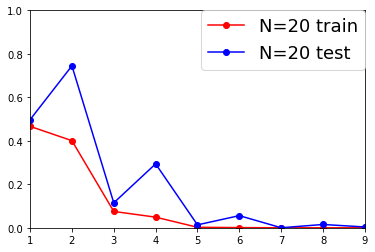

In [259]:
#7.15

x_axis=[i for i in range(1,10)]
y20_train, y20_test = [], []

def plot_err(N):
    for m in range(1,10):
        _w=minimize_erms(m, N, 10)
        err_train=calc_erms(m, x_first_half, t_first_half, _w)
        err_test=calc_erms(m,x_second_half, t_second_half, _w)
        if N==20:
            y20_train.append(err_train)
            y20_test.append(err_test)
        elif N==50:
            y50_train.append(err_train)
            y50_test.append(err_test)
        else:
            y100_train.append(err_train)
            y100_test.append(err_test)
            
plot_err(20)
plt.plot(x_axis,y20_train, '-o', c='r', label="N=20 train")
plt.plot(x_axis, y20_test, '-o', c='b', label="N=20 test")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)

plt.axis([1,9,0,1])
#7.16plt.show()

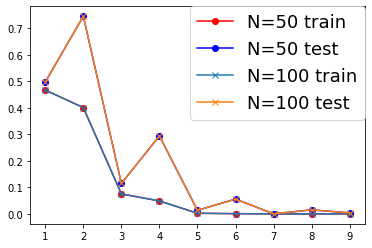

In [258]:
#7.16

y50_train, y50_test = [], []
y100_train, y100_test = [], []
plot_err(50)
plot_err(100)
plt.plot(x_axis, y50_train, '-o', c='r', label='N=50 train')
plt.plot(x_axis, y50_test, '-o', c='b', label='N=50 test')
plt.plot(x_axis, y100_train,'-x', label='N=100 train')
plt.plot(x_axis, y100_test, '-x', label='N=100 test')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
plt.show()

In [89]:
#7.17
def generate_rand_int():
    a=np.empty((1,20))
    while True:
        f=False
        a=np.random.randint(1,6,20)
        for i in range(1,6):
            if i not in a:
                f=True
                break
        if f: continue
        else: return a
        
    

In [91]:
#7.18
def separate_data():
    a=generate_rand_int()
    data=np.loadtxt('N-20.txt')

    data_train=data[a!=5]
    data_test=data[a==5]
    return [data_train,data_test]

In [265]:
def split_and_test(M):
    _w=minimize_erms(M, 20, 10)
    train,test=separate_data()
    x_train, y_train=train[:,0], train[:, 1]
    x_test, y_test=test[:, 0], test[:, 1]
    test_err=calc_erms(M, x_train, y_train, _w)
    return test_err
        
    

In [266]:
#7.19
def cross_validation(M):
    mean_erms=[]
    for _ in range(5):
        err=split_and_test(M)
        mean_erms.append(err)
    
    return (np.sum(mean_erms)/5)

cross_validation(9)

21.784842518500017

In [268]:
#7.20
y_mean_err=[]
for m in range(1,10):
    err=cross_validation(m)
    y_mean_err.append(err)
plt.xlabel("M")
plt.yb
plt.plot(x_axis, y_mean_err, '-o', label='')

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
def opt_m():
    min_err=10000
    for m in range(1,10):
        err=cross_validation(m)
        if err<min_err:
            min_err=err
    return min_err

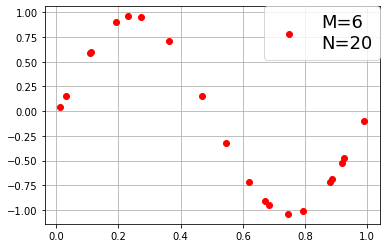

In [271]:
#7.22
x=data[:,0]
A=generate_matrix(6,x)
T=generate_vector(6,data)
w=calc_coeff(A,T)
y=calc_polynomial(6,x,w)
plt.plot(x,y,'o', color='r', label='M=6\nN=20')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)

plt.grid()
plt.show()

In [218]:
#7.24
def calc_erms_reg(M,x,t,data,lam):
    N=len(t)
    A=generate_matrix(M,x)
    T=generate_vector(M,data)
    w=solve_rpr(A,lam,T)
    y=calc_polynomial(M,x,w)
    sum=0
    for n in range(N):
        sum+=np.power(y[n]-t[n], 2)
    return np.sqrt(sum)/2 + np.power(np.abs(np.sum(w)), 2)*lam/2

def solve_rpr(A,lam,T):
    N=len(T)
    return np.linalg.solve(A+lam*np.eye(N), T)

#print(solve_rpr(generate_matrix(3,x_first_half), 0.00001, generate_vector(3,data_first_half)))

#w=minimize_erms(9,20,10)
#print(calc_erms_reg(3,x_first_half, t_first_half, w, 0.00000001))

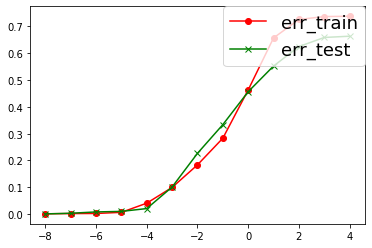

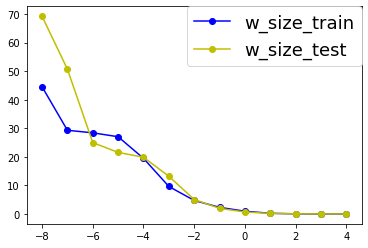

In [274]:
#7.25
np.random.shuffle(data)
x_train, t_train = data[:10,0], data[:10, 1]
x_test, t_test = data[10:,0], data[10:, 1]

def size_w(w):
    M=len(w)
    sum=0
    for m in range(M):
        sum+=w[m]**2
    return np.sqrt(sum)

def erms_reg_by_lambda():
    x_axis=[]
    w_train_sizes, w_test_sizes=[], []
    err_train_reg, err_test_reg=[], []
    for i in range(-8, 5):
        x_axis.append(i)
        
        #パラメータ
        lam=10**i
        A_train, A_test=generate_matrix(9, x_train), generate_matrix(9, x_test)
        T_train, T_test=generate_vector(9, data[:10]), generate_vector(9, data[10:])
        w_train=solve_rpr(A_train, lam, T_train)
        w_test=solve_rpr(A_test, lam, T_test)
        
        err_train=calc_erms(9,x_train,t_train,w_train)
        err_test=calc_erms(9,x_test,t_test,w_test)
        err_train_reg.append(err_train)
        err_test_reg.append(err_test)
        
        w_train_sizes.append(size_w(w_train))
        w_test_sizes.append(size_w(w_test))
    
    fig=plt.figure()
    fig.add_subplot(111)
    ax.set_xticks([-8,-4,0,4])    
    plt.plot(x_axis, err_train_reg, '-o', c='r', label='err_train')
    plt.plot(x_axis, err_test_reg, '-x', c='g', label='err_test')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)

    plt.show()
    plt.plot(x_axis, w_train_sizes, '-o', c='b', label='w_size_train')
    plt.plot(x_axis, w_test_sizes, '-o', c='y', label='w_size_test')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)

    plt.show()
    
            


erms_reg_by_lambda()

[0.1608789]


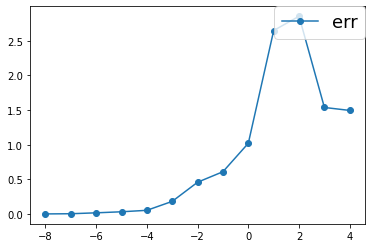

In [277]:
#7.26

def split_and_test_reg(lam):
    train,test=separate_data()
    x_train, t_train=train[:,0], train[:, 1]
    x_test, t_test=test[:, 0], test[:, 1]
    test_err=calc_erms_reg(9, x_train, t_train, train, lam)
    return test_err

print(split_and_test_reg(0.001))

def cross_validation_reg_split(lam):
    mean_erms=[]
    for _ in range(5):
        err=split_and_test_reg(lam)
        mean_erms.append(err)
    
    return (np.mean(mean_erms))

x_axis=[]
def cross_validation_reg_by_lambda():
    errs=[]
    for i in range(-8,5):
        x_axis.append(i)
        lam=10**i
        errs.append(cross_validation_reg_split(lam))
    return errs
       

plt.plot(x_axis, cross_validation_reg_by_lambda(), '-o', label='err')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)

In [225]:
#7.27
def calc_opt_lambda():
    min_err=100000000
    opt_lam=0
    for i in range(-8,5):
        lam=10**i
        err=cross_validation_reg_split(lam)
        if err<min_err:
            min_err=err
            opt_lam=lam
    return opt_lam

print(calc_opt_lambda())
        

1e-08


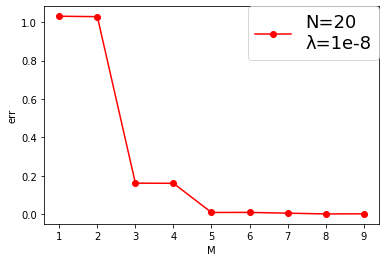

In [280]:
#7.28

x_axis, errs=[], []
x_train, t_train=data[:,0], data[:,1]
for m in range(1,10):
    x_axis.append(m)
    errs.append(calc_erms_reg(m,x_train,t_train,data, 10**(-8)))

fig=plt.figure()
fig.add_subplot(111)
ax.set_xticks([-8,-4,0,4])    
plt.plot(x_axis, errs, '-o', c='r', label='N=20\nλ=1e-8')
plt.xlabel("M")
plt.ylabel("err")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
plt.show()